In [114]:
!pip install opendatasets --upgarde


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgarde


In [115]:
import opendatasets as od

In [116]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [117]:
import os

In [118]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [119]:
import pandas as pd

In [120]:
survey_raw_df=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [121]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [122]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [123]:
schema_fname='stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [124]:
schema_raw=pd.read_csv(schema_fname,index_col='Column').QuestionText

In [125]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [126]:
schema_raw.loc['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

In [127]:
selected_columns=[
    #Demographics
    'Country',
    'Age',
   'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming experices
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Emplyment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
]
    
    


In [128]:
survey_df = survey_raw_df[selected_columns].copy()

In [129]:
len(selected_columns)

20

In [130]:
schema=schema_raw[selected_columns]

In [131]:
survey_df.shape

(64461, 20)

In [132]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [133]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [134]:
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCodePro']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')
# error='coerce set the invalid value to NaN

In [135]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,57473.000000,57473.000000,41151.000000
mean,30.834111,15.476572,15.476572,15.476572,40.782174
std,9.585392,5.114081,5.114081,5.114081,17.816383
min,1.000000,5.000000,5.000000,5.000000,1.000000
25%,24.000000,12.000000,12.000000,12.000000,40.000000
50%,29.000000,15.000000,15.000000,15.000000,40.000000
75%,35.000000,18.000000,18.000000,18.000000,44.000000
max,279.000000,85.000000,85.000000,85.000000,475.000000


There seems to be a problem with age column,as the minimum value is 1 and max value is 279. This is a common issue with survey : responeses may contain invalid values due to accidental or intentional error while responding. A simple fix would be ignore the rows where the value o the age  column is higher than 100 years or lower than 10 years as invalid survey responses. This can be done by .drop method


In [136]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)

The same hold for WorkWeekhrs. Let's ignore entities where values for the column is higher than 140 hours

In [137]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [138]:
survey_df['Gender'].value_counts()


Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [139]:
import numpy as np

In [140]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True) # np.nan=Nan

In [141]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [142]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
15017,Brazil,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,10.0,10.0,10.0,C++;Java;JavaScript;Python;SQL;Swift;VBA,Java;JavaScript;Python;SQL;Swift,Once a year,Visit Stack Overflow,Employed full-time,Data or business analyst;Product manager,40.0,Slightly satisfied,Industry that I’d be working in;Specific depar...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
58192,Mexico,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,14.0,14.0,14.0,C#;HTML/CSS;JavaScript;PHP;SQL,C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL;Typ...,Every few months,Meditate;Play games;Visit Stack Overflow;Watch...,"Not employed, but looking for work","Developer, back-end;Developer, desktop or ente...",NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,Very important
36427,South Korea,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;SQL,Go;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL;...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
1612,Denmark,59.0,Man,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,16.0,16.0,C#;C++;SQL,C#;JavaScript,Once a year,Meditate;Call a coworker or friend;Visit Stack...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",37.0,Slightly satisfied,Flex time or a flexible schedule;Financial per...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
15524,Morocco,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",No,19.0,19.0,19.0,HTML/CSS;JavaScript;Python;SQL,Java;JavaScript;PHP;SQL,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Eng...",40.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Often: 1-2 days per week or more,Fairly important
40541,Czech Republic,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
1265,United States,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,13.0,13.0,C++;HTML/CSS;Java;Python,HTML/CSS;Java;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, embedded applications or devices",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Financial per...,Occasionally: 1-2 days per quarter but less th...,Critically important
37217,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
7230,Israel,35.0,Man,Primary/elementary school,NaN,Yes,14.0,14.0,14.0,HTML/CSS;Java;JavaScript;PHP;SQL,JavaScript,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, front-end",45.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
3016,United States,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,14.0,14.0,Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...,Haskell;Python;Rust;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Engineer, data;En...",40.0,Very satisfied,Remote work options;Financial performance or f...,Sometimes: 1-2 days per month but less than we...,Very important


## Analysis And Visualization

In [143]:
import seaborn  as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

## Country

In [144]:
schema.loc['Country']

'Where do you live?'

In [145]:
(survey_df.Country.nunique())#number of unique value 

183

In [146]:
top_countries = survey_df.Country.value_counts().head(15).reset_index()
top_countries

,Country,count
0,United States,12371
1,India,8364
2,United Kingdom,3881
3,Germany,3864
4,Canada,2175
5,France,1884
6,Brazil,1804
7,Netherlands,1332
8,Poland,1259
9,Australia,1199


C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


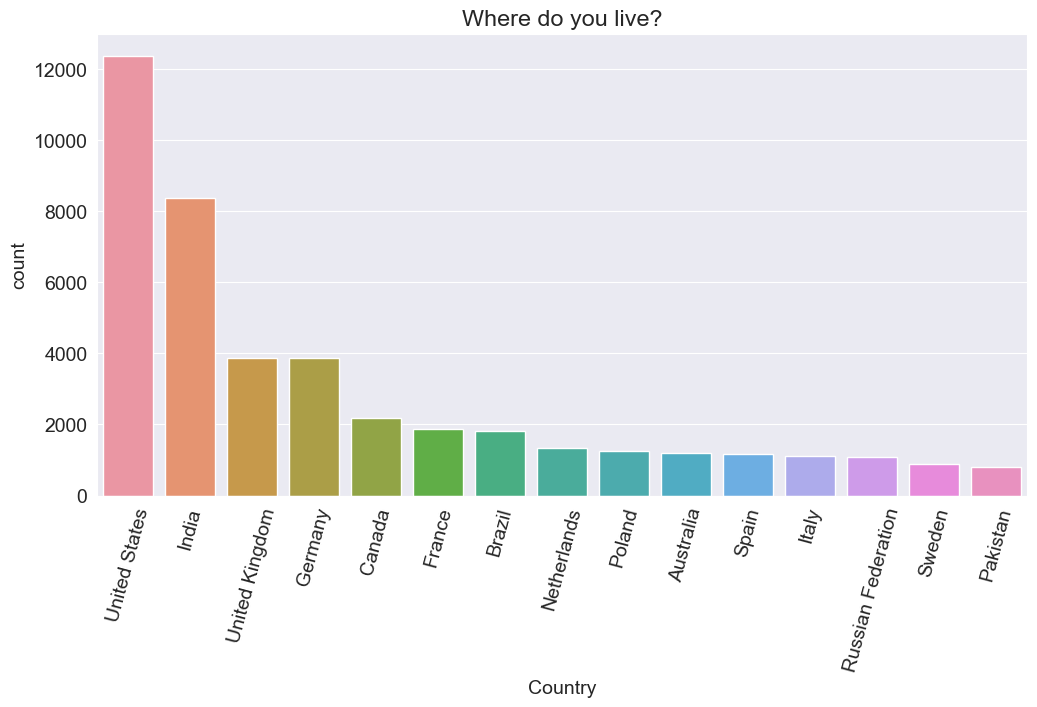

In [147]:

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x='Country',y='count',data=top_countries);

## Age

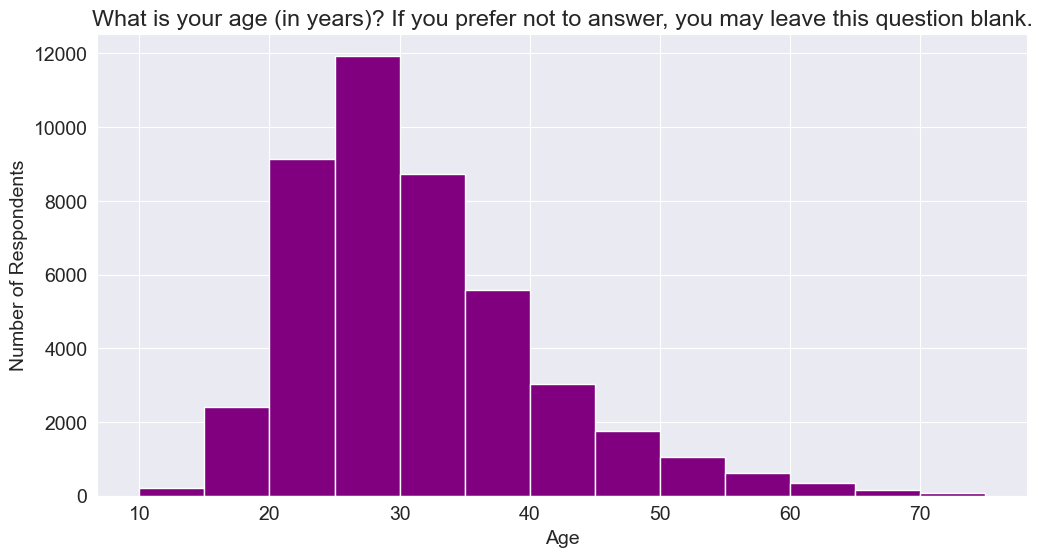

In [148]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.hist(survey_df.Age,bins=np.arange(10,80,5),color='purple');

 It appear that  a large percentage of respondent are in the age group of 20-45 which is somewhat  representative of the programmming community in general as a lot of young people have taken up computer as their feild of study in last 20 years

In [149]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [150]:
gender_counts=survey_df.Gender.value_counts()

In [151]:
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

A pie chart  would be good way to vizualize he distribution

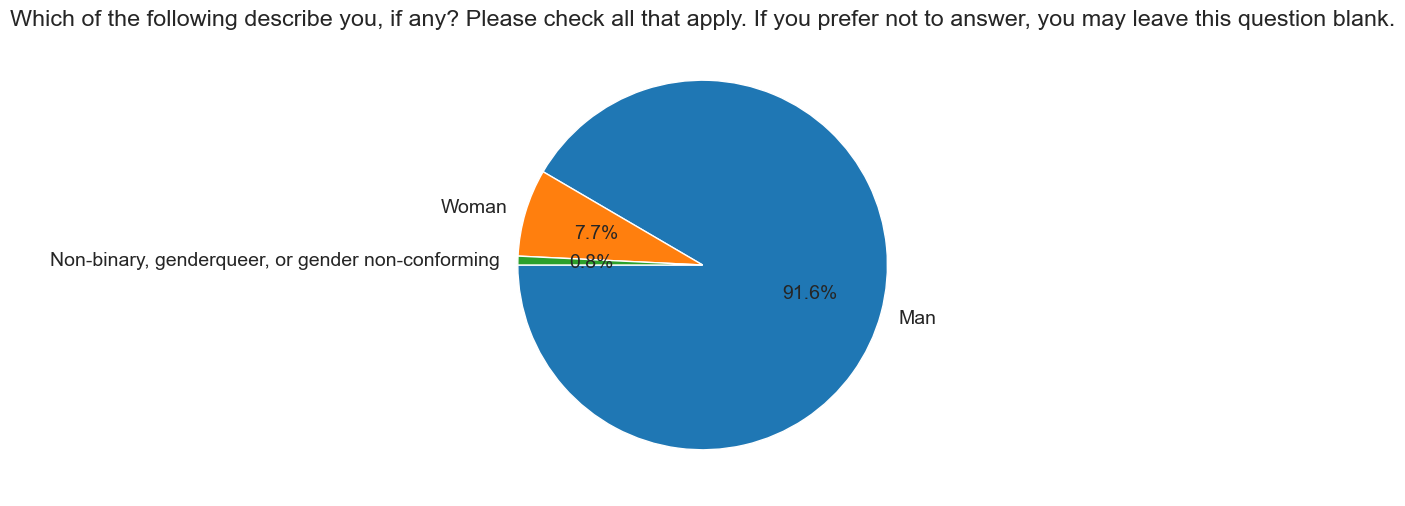

In [155]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180);

## Education Level

In [156]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


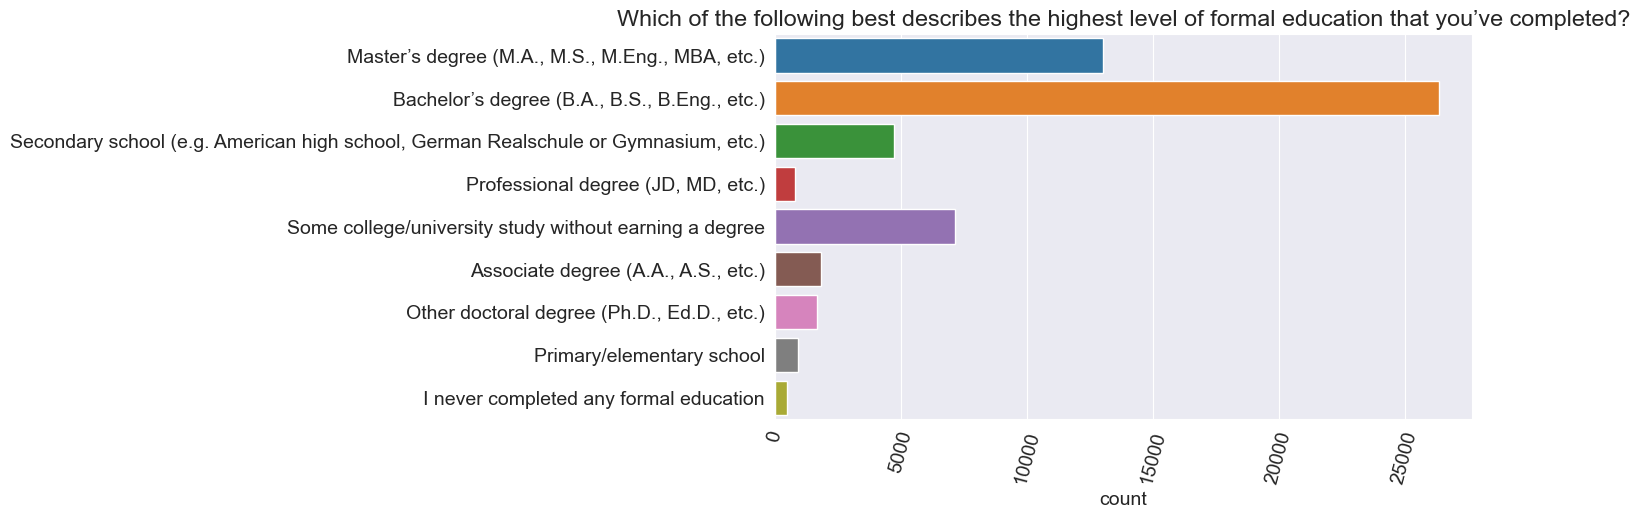

In [157]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

In [158]:
schema.UndergradMajor

'What was your primary field of study?'

C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


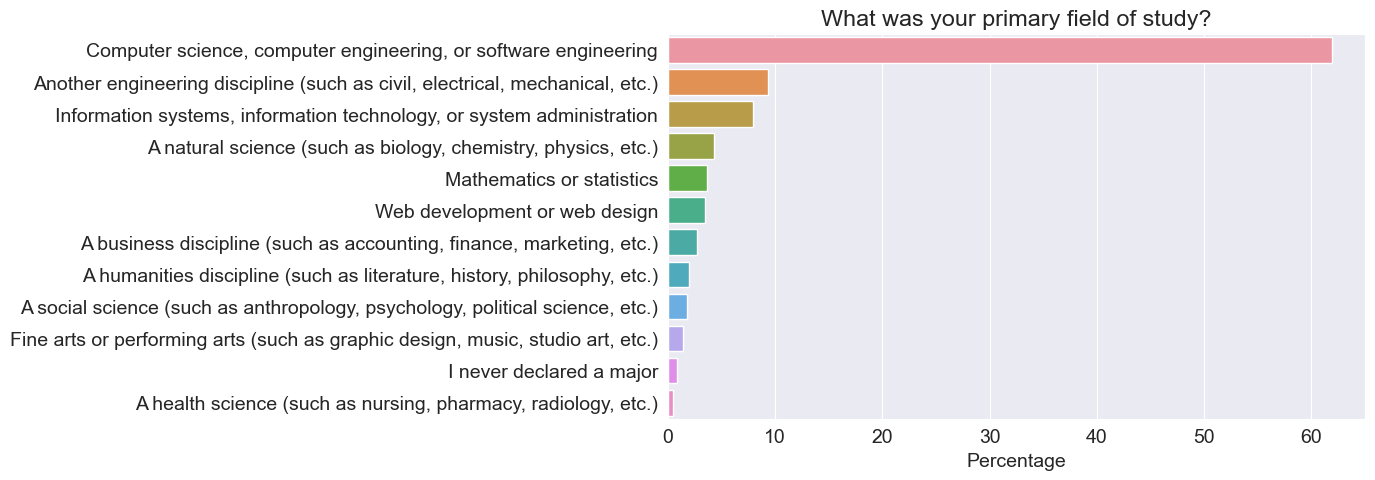

In [159]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [160]:
schema.Employment

'Which of the following best describes your current employment status?'

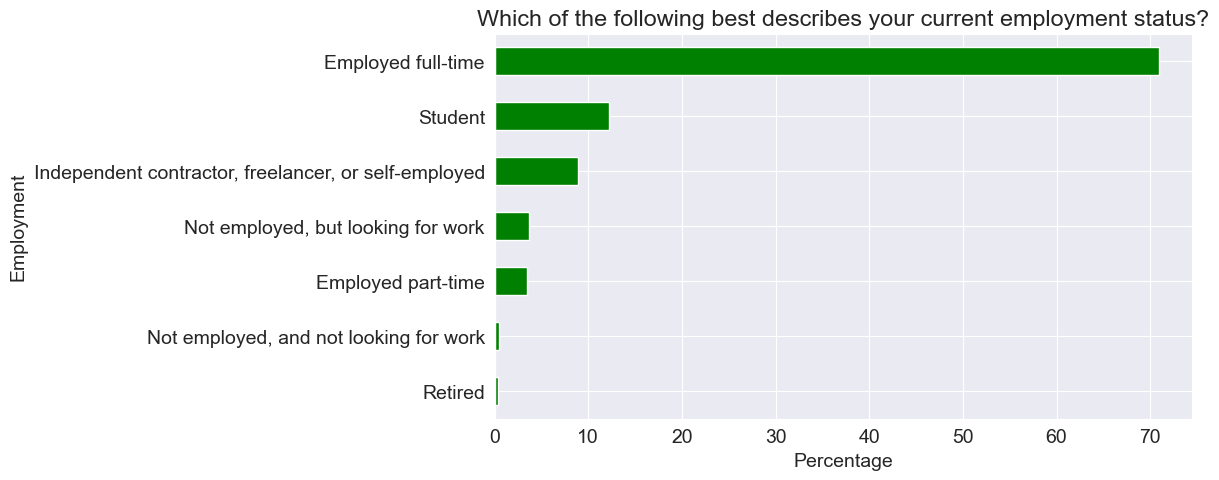

In [161]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [162]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [182]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [220]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [252]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [253]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [254]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

### Questions And Answer

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [206]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [225]:
Languages_Popular=split_multicolumn(survey_df.LanguageWorkedWith)

In [226]:
Languages_Popular

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [227]:
Languages_Popular.count()

C#                       64306
HTML/CSS                 64306
JavaScript               64306
Swift                    64306
Objective-C              64306
Python                   64306
Ruby                     64306
SQL                      64306
Java                     64306
PHP                      64306
C                        64306
TypeScript               64306
Bash/Shell/PowerShell    64306
Kotlin                   64306
R                        64306
VBA                      64306
Perl                     64306
Scala                    64306
C++                      64306
Go                       64306
Haskell                  64306
Rust                     64306
Dart                     64306
Julia                    64306
Assembly                 64306
dtype: int64

In [228]:
languages_worked_percentages = Languages_Popular.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


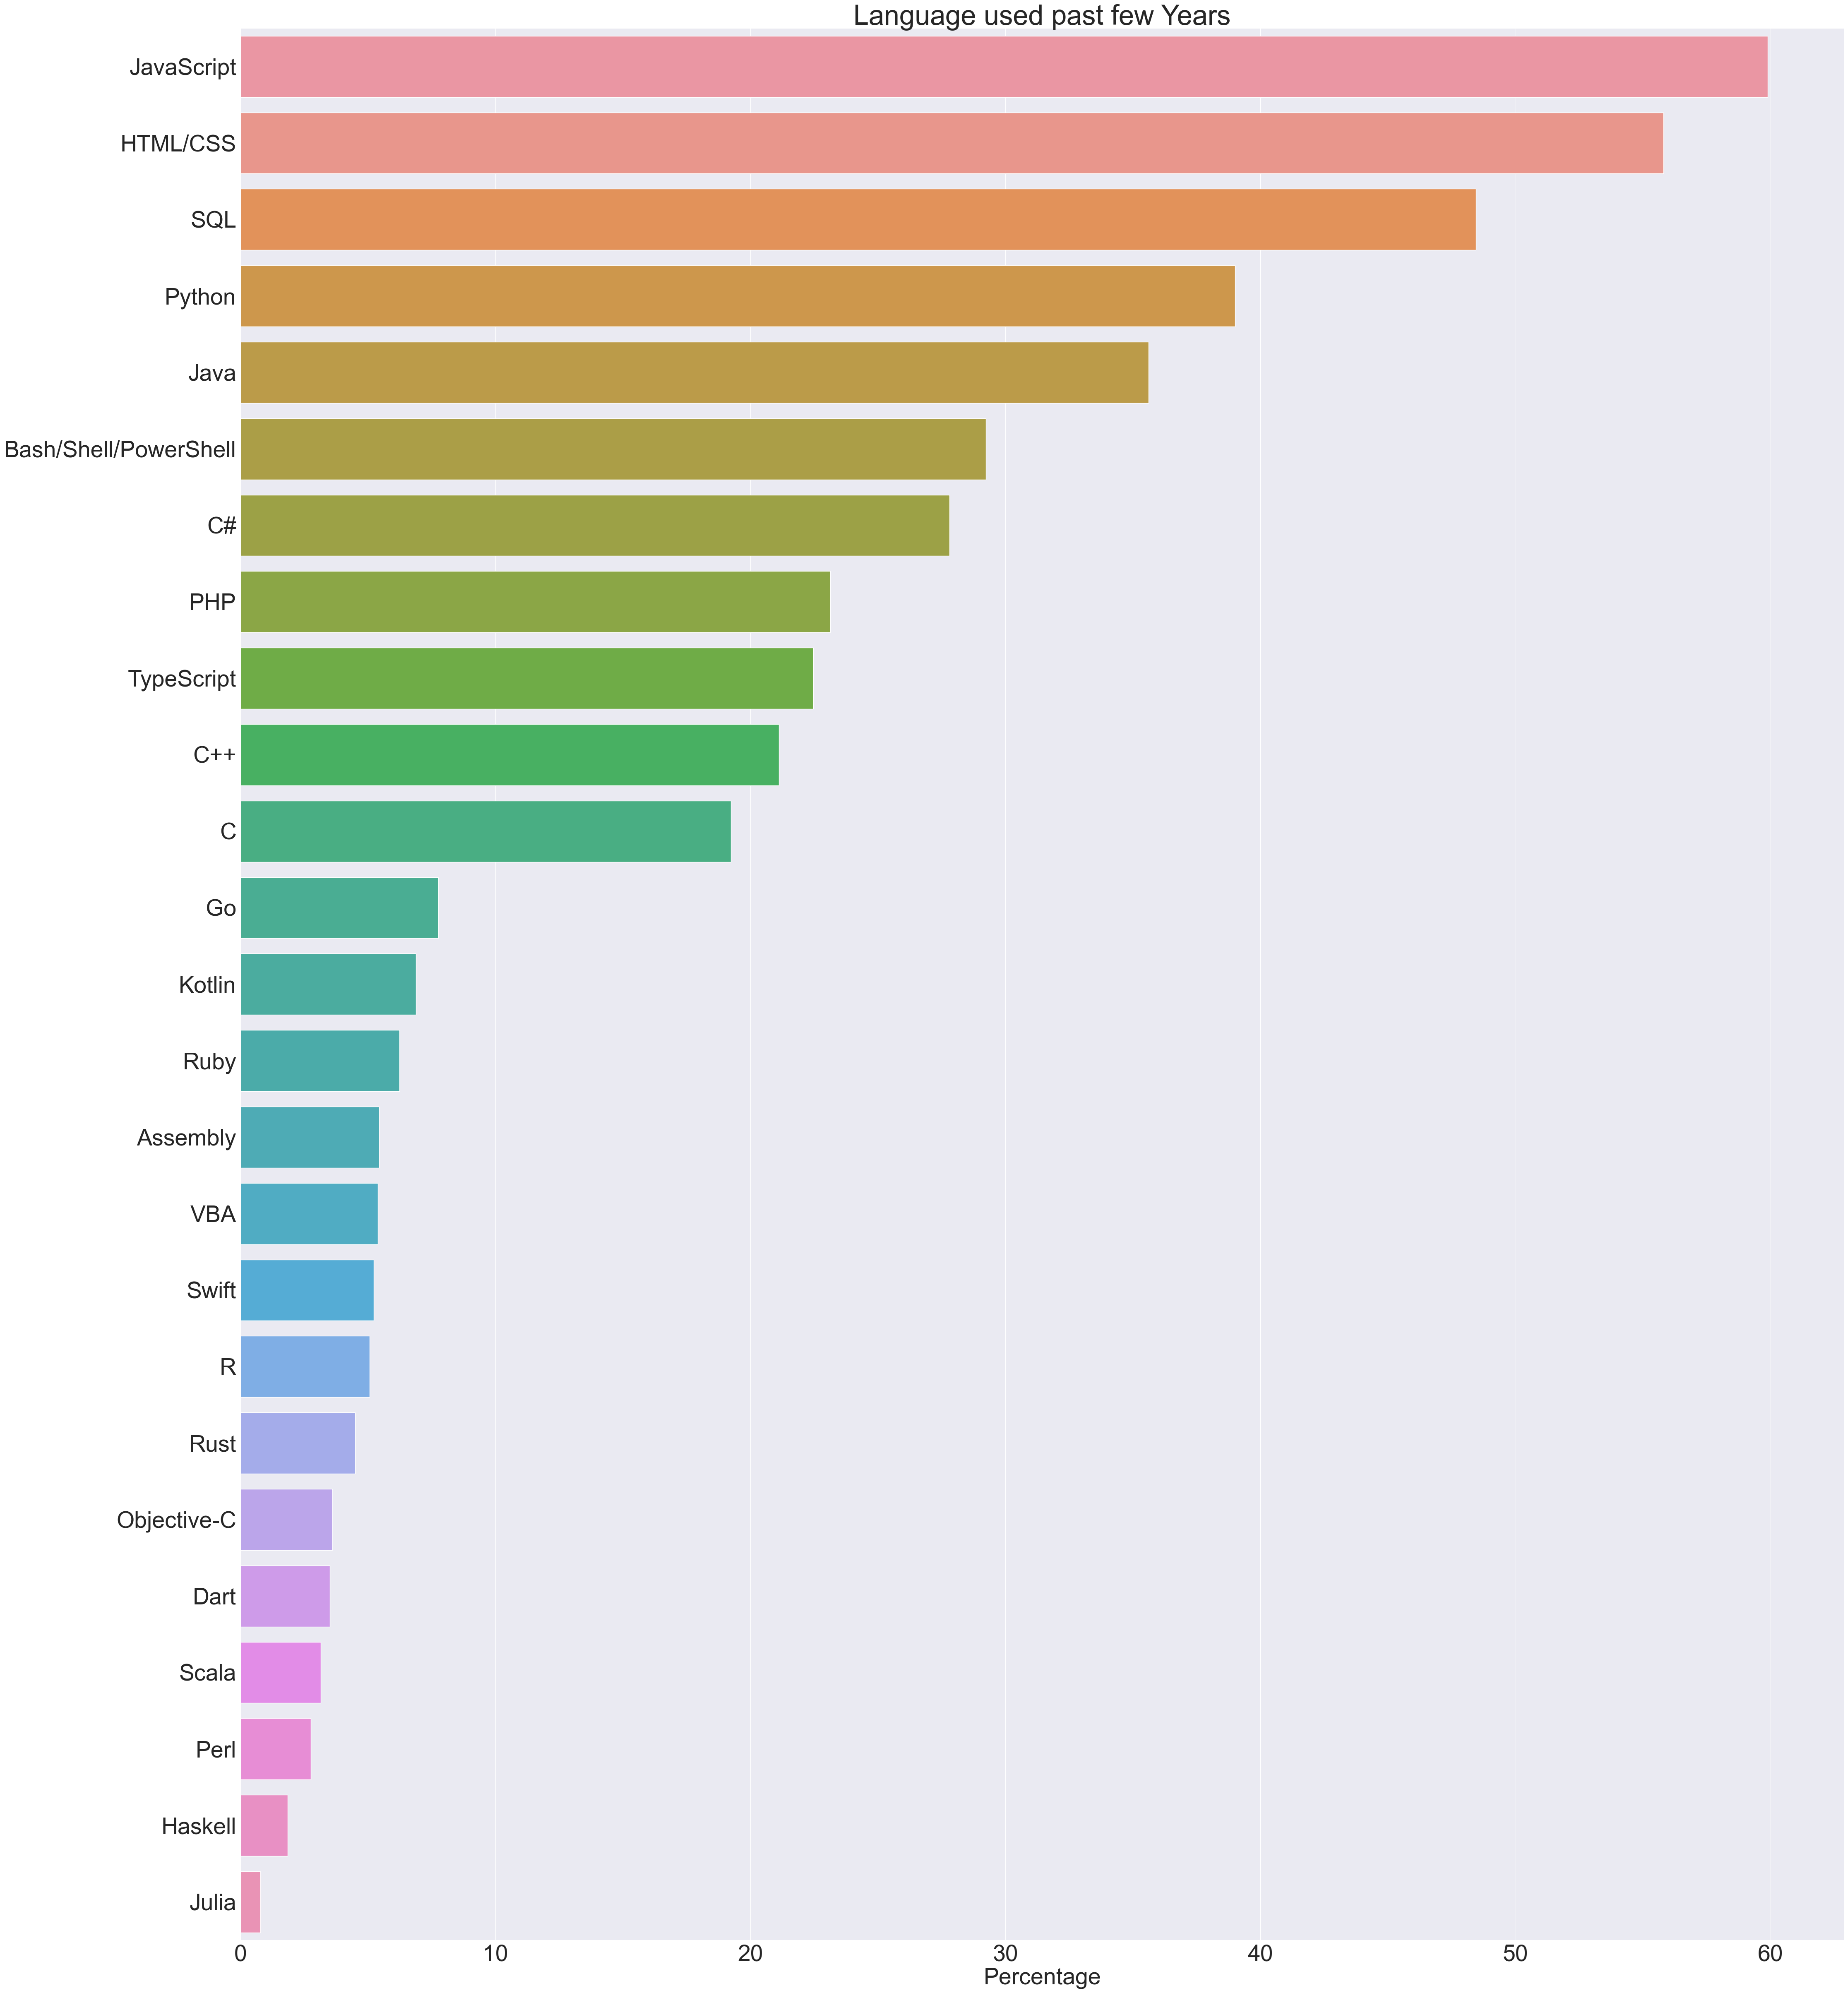

In [249]:
matplotlib.rcParams['font.size']=40
plt.figure(figsize=(50,60))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title('Language used past few Years')
plt.xlabel('Percentage');

What are the most common languages among respondents who do not describe themselves as "Developer, front-end"?

In [285]:
a=dev_type_df[dev_type_df['Developer, full-stack']==False].index
s=survey_df.loc[a].LanguageWorkedWith

In [313]:
Languages_Popular_front_end=split_multicolumn(s)
Languages_Popular_front_end

,Objective-C,Python,Swift,HTML/CSS,Ruby,SQL,Java,JavaScript,C#,PHP,...,C++,Kotlin,R,Go,Haskell,VBA,Julia,Assembly,Rust,Dart
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [326]:
Languages_Popular_front_end_percentage= Languages_Popular_front_end.mean().sort_values(ascending=False)*100
Languages_Popular_front_end_percentage

JavaScript               44.002567
HTML/CSS                 42.868605
Python                   41.041962
SQL                      38.677757
Java                     34.773074
Bash/Shell/PowerShell    26.236260
C++                      24.639619
C                        22.732743
C#                       21.654944
PHP                      17.961542
TypeScript               11.887887
Kotlin                    7.031104
Go                        6.718194
Assembly                  6.643310
R                         6.357145
Swift                     5.533417
VBA                       5.137600
Ruby                      4.626782
Rust                      4.517130
Objective-C               3.730844
Dart                      3.241422
Scala                     3.139793
Perl                      2.685138
Haskell                   2.003156
Julia                     0.994892
dtype: float64

From the above analysis it is observed that Javascript is the most popular language Language among Developer, front -end

# Q: Which languages are the most people interested to learn over the next year?
For this, we can use the LanguageDesireNextYear column, with similar processing as the previous one.

In [327]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


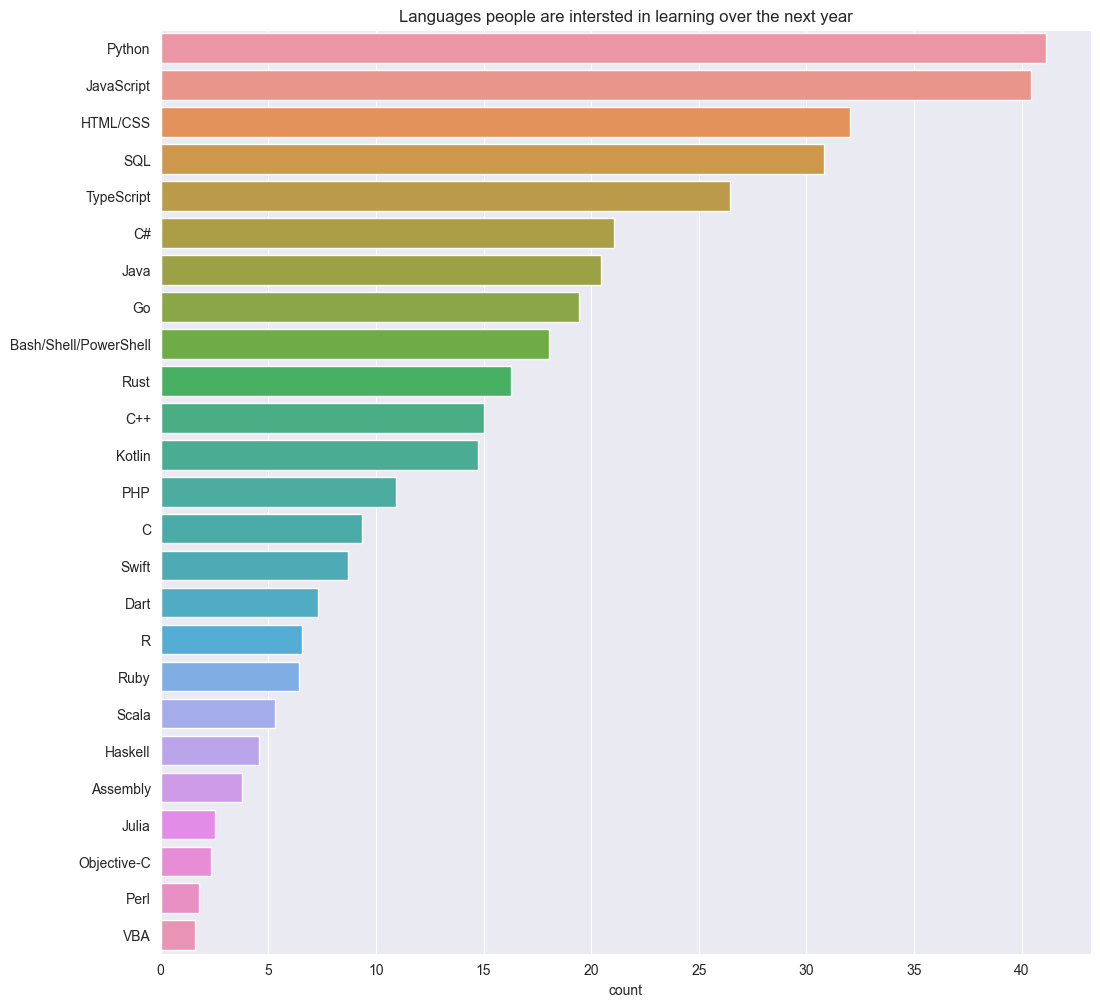

In [330]:
matplotlib.rcParams['font.size']=10
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.
To answer this question, we'll need to use the groupby data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [336]:
countries_df=survey_df.groupby('Country')['WorkWeekHrs'].mean().sort_values(ascending=False)

In [337]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [341]:
high_response_countries_df.reset_index()

,Country,WorkWeekHrs
0,Iran,44.337748
1,Israel,43.915094
2,China,42.150000
3,United States,41.802982
4,Greece,41.402724
5,Viet Nam,41.391667
6,South Africa,41.023460
7,Turkey,40.982143
8,Sri Lanka,40.612245
9,New Zealand,40.457551


Developers of Iran works highest number of hours per week

#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of Age vs. YearsCodePro (i.e., years of coding experience) to answer this question.

In [342]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\priya goswami\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

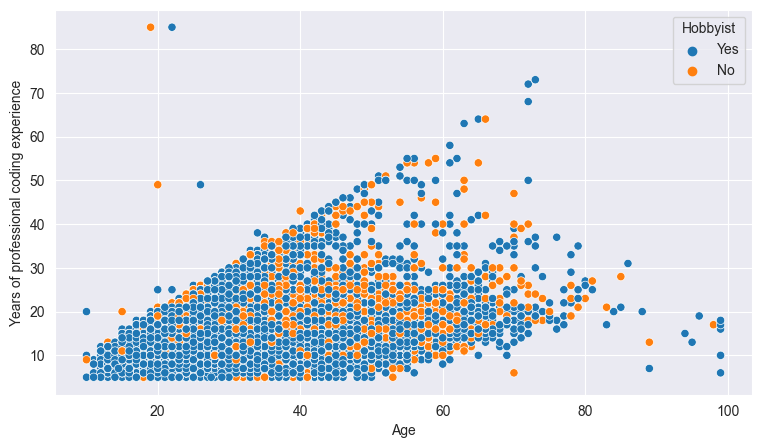

In [343]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");